
### Querying Zip Codes from U.S. Census

To run the data, you can also add the 1000 zipcodes and 26000 zip codes CSV manually. They're included in the Actual Dataset folder in the Google Drive! There are preloadded cells below to load in the precleaned CSVs.

### Importing State Data by Zip Code

In [ ]:
df_zip_states = pd.read_csv("uszips.csv")
df_zip_states["zip"] = df_zip_states["zip"].astype(str).str.zfill(5)
df_zip_states

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,00601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16721.0,100.2,72001,Adjuntas,"{""72001"": 98.74, ""72141"": 1.26}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,00602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37510.0,477.6,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,00603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,48317.0,543.1,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,00606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5435.0,47.3,72093,Maricao,"{""72093"": 82.27, ""72153"": 11.66, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,00610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,25413.0,264.4,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.82, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33778,99923,55.98043,-130.03803,Hyder,AK,Alaska,True,NaN,25.0,0.6,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka
33779,99925,55.55398,-132.96276,Klawock,AK,Alaska,True,NaN,854.0,6.1,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka
33780,99926,55.12617,-131.48928,Metlakatla,AK,Alaska,True,NaN,1385.0,4.0,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Metlakatla
33781,99927,56.33305,-133.60044,Point Baker,AK,Alaska,True,NaN,18.0,1.5,2198,Prince of Wales-Hyder,"{""02198"": 100}",Prince of Wales-Hyder,02198,False,False,America/Sitka


### Merging State Data to Zip Codes

In [ ]:
df_zips_and_states = top_1000_zips.merge(right=df_zip_states[["zip", "state_id", "lat", "lng", "city", "density", "county_fips", "county_name"]], left_on="Zip Code", right_on="zip")

df_zips_and_states = df_zips_and_states[df_zips_and_states["Population Size"] != 0]
df_zips_and_states = df_zips_and_states[["Population Size", "Zip Code", "state_id", "lat", "lng", "city", "density", "county_fips", "county_name"]]

df_zips_and_states.columns = ['Population Size', 'Zip Code', 'State', 'Latitude', 'Longitude', 'City', 'Population Density', 'County FIPS', 'County Name']

df_zips_and_states

,Population Size,Zip Code,State,Latitude,Longitude,City,Population Density,County FIPS,County Name
0,137213,77494,TX,29.74566,-95.82302,Katy,1398.4,48157,Fort Bend
1,136784,08701,NJ,40.07635,-74.20311,Lakewood,2135.0,34029,Ocean
2,123042,77449,TX,29.83674,-95.73547,Katy,1756.9,48201,Harris
3,118437,78660,TX,30.44361,-97.59558,Pflugerville,1025.1,48453,Travis
4,112211,77433,TX,29.94920,-95.73979,Cypress,734.7,48201,Harris
...,...,...,...,...,...,...,...,...,...
33171,2,72636,AR,35.99121,-92.71651,Gilbert,4.9,5129,Searcy
33172,1,99638,AK,53.01329,-168.75359,Nikolski,0.0,2016,Aleutians West
33173,1,57439,SD,45.33464,-98.10007,Ferney,1.0,46013,Brown
33174,1,82224,WY,42.93677,-104.88811,Lost Springs,0.0,56009,Converse


### Convert Zip Codes to List for Subsequent API Querying

In [ ]:
zip_codes = df_zips_and_states["Zip Code"].tolist()
zip_codes = zip_codes[:1000]
zip_codes

['77494',
 '08701',
 '77449',
 '78660',
 '77433',
 '60629',
 '77084',
 '11368',
 '11208',
 '79936',
 '11385',
 '92336',
 '90011',
 '37013',
 '90650',
 '30044',
 '11226',
 '94565',
 '11373',
 '91331',
 '77573',
 '79938',
 '10467',
 '77429',
 '90044',
 '78130',
 '75052',
 '92335',
 '11236',
 '90250',
 '11219',
 '90805',
 '90201',
 '10314',
 '91342',
 '11207',
 '78641',
 '00926',
 '10025',
 '34787',
 '77479',
 '60618',
 '90280',
 '78245',
 '77584',
 '11220',
 '11221',
 '92683',
 '11206',
 '78613',
 '30043',
 '11214',
 '11230',
 '92503',
 '93307',
 '11212',
 '92345',
 '78521',
 '60632',
 '11234',
 '78666',
 '85142',
 '10456',
 '73099',
 '99301',
 '75035',
 '78542',
 '60647',
 '37042',
 '30024',
 '91911',
 '75217',
 '60639',
 '93722',
 '92376',
 '22193',
 '93727',
 '11377',
 '96706',
 '92804',
 '95823',
 '60804',
 '77379',
 '92154',
 '79928',
 '11233',
 '34953',
 '95076',
 '11235',
 '27587',
 '84043',
 '76063',
 '60608',
 '77407',
 '11204',
 '77459',
 '92592',
 '93033',
 '93535',
 '92704',


### Query Federal Government GSA API for Per Diem Rates

In [ ]:
import requests
import pandas as pd
import time

headers = {
    "x-api-key": "QMVs4H9JiK1KF23lDzesf1GNbHIJ3IhaSraQxU5r",
}

# Year for which to retrieve per diem rates
year = "2024"

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through each zip code
for zip_code in zip_codes:
    url = f"https://api.gsa.gov/travel/perdiem/v2/rates/zip/{zip_code}/year/{year}"

    try:
        # Send GET request
        response = requests.get(url, headers=headers)

        # Check if the request was successful
        if response.status_code == 200:
            # Parse JSON response
            data = response.json()

            # Extract relevant data for DataFrame
            rates = data.get('rates', [])
            if rates:  # Ensure rates exist
                for rate in rates:
                    for rate_detail in rate.get('rate', []):
                        months = rate_detail.get('months', {}).get('month', [])
                        for month in months:
                            # Create a DataFrame row for each month
                            row = {
                                'Zip Code': rate_detail.get('zip'),
                                'City': rate_detail.get('city'),
                                'County': rate_detail.get('county'),
                                'State': rate.get('state'),
                                'Year': rate.get('year'),
                                'Month': month.get('long'),
                                'Rate': month.get('value'),
                                'Meals': rate_detail.get('meals')
                            }
                            # Append the row to a DataFrame
                            dataframes.append(pd.DataFrame([row]))
            time.sleep(0.1)  # Add a delay of 0.1 seconds between requests
        else:
            print(f"Failed to retrieve data for {zip_code}. Status code: {response.status_code}")
    except Exception as e:
        print(f"An error occurred for {zip_code}: {e}")

# Combine all DataFrames into a single DataFrame
if dataframes:  # Ensure there are DataFrames to concatenate
    final_dataframe = pd.concat(dataframes, ignore_index=True)
    # Display the combined DataFrame
    print(final_dataframe.head())
else:
    print("No data available to concatenate.")

Failed to retrieve data for 19380. Status code: 429
Failed to retrieve data for 32304. Status code: 429
  Zip Code           City County State  Year     Month  Rate  Meals
0    77494  Standard Rate   None    TX  2024   January   107     59
1    77494  Standard Rate   None    TX  2024  February   107     59
2    77494  Standard Rate   None    TX  2024     March   107     59
3    77494  Standard Rate   None    TX  2024     April   107     59
4    77494  Standard Rate   None    TX  2024       May   107     59


### Zip Codes and Per Diem Rates for Each Month

In [ ]:
final_dataframe

,Zip Code,City,County,State,Year,Month,Rate,Meals
0,77494,Standard Rate,None,TX,2024,January,107,59
1,77494,Standard Rate,None,TX,2024,February,107,59
2,77494,Standard Rate,None,TX,2024,March,107,59
3,77494,Standard Rate,None,TX,2024,April,107,59
4,77494,Standard Rate,None,TX,2024,May,107,59
...,...,...,...,...,...,...,...,...
13231,27265,Greensboro,Guilford,NC,2024,August,116,64
13232,27265,Greensboro,Guilford,NC,2024,September,116,64
13233,27265,Greensboro,Guilford,NC,2024,October,120,64
13234,27265,Greensboro,Guilford,NC,2024,November,120,64


### Zip Codes and Averaged Per Diem Rates

In [ ]:
# calculate average per diem rate for each zip code
per_diem = final_dataframe.groupby('Zip Code')['Rate'].mean()
per_diem = pd.DataFrame(per_diem)

# Extract unique city names associated with each zip code
unique_cities = final_dataframe[['Zip Code', 'City']].drop_duplicates()

# If there are multiple cities per zip code, take the first one
city_by_zip = unique_cities.groupby('Zip Code')['City'].first()

# Add the City column to the per_diem DataFrame
per_diem['isStandard'] = per_diem.index.map(city_by_zip)

per_diem

,Rate,isStandard
Zip Code,,
10002,256.666667,New York City
10003,256.666667,New York City
10009,256.666667,New York City
10016,256.666667,New York City
10023,256.666667,New York City
...,...,...
98661,164.500000,Vancouver
98682,164.500000,Vancouver
99208,127.000000,Spokane


### Zip Codes and Averaged Meal Rates

In [ ]:
meals = final_dataframe.groupby('Zip Code')['Meals'].mean()

meals = pd.DataFrame(meals)

meals

,Meals
Zip Code,
10002,79.0
10003,79.0
10009,79.0
10016,79.0
10023,79.0
...,...
98661,74.0
98682,74.0
99208,74.0


### Import House Prices by Zip Code Nationwide

In [ ]:
df_house_prices=pd.read_csv("zillow.csv")

df_house_prices['Zip Code'] = df_house_prices['RegionName'].astype(str).str.zfill(5)

df_house_prices

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,Zip Code
0,91982,1,77494,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,209050.476760,...,495075.413843,495380.402566,495002.983332,495408.561941,496096.305465,497215.161891,497931.319966,498348.024838,498770.070517,77494
1,61148,2,8701,zip,NJ,NJ,Lakewood,"New York-Newark-Jersey City, NY-NJ-PA",Ocean County,129618.780605,...,574111.688523,579228.585853,583825.798950,588765.877710,594583.485735,599788.275075,603106.031473,605075.749335,605701.713141,08701
2,91940,3,77449,zip,TX,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,103655.528341,...,282147.022097,282107.280779,281872.890421,281691.186379,281502.991848,281086.410278,280298.902221,279570.221742,278960.087685,77449
3,62080,4,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,146323.411563,...,452805.954270,453500.452732,452997.379756,452371.998659,453320.495788,453075.343776,451863.571974,449627.300182,447532.075931,11368
4,91733,5,77084,zip,TX,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,102106.861831,...,274613.196678,274446.918170,274155.370186,273883.459171,273631.254558,273125.765642,272528.815424,272190.921082,271949.294782,77084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26318,63527,39992,14441,zip,NY,NY,Dresden,"Rochester, NY",Yates County,95200.506993,...,212859.345739,217705.207088,220747.040461,223033.160778,225156.691276,227314.268636,228544.608118,228472.620494,227382.444478,14441
26319,99927,39992,98628,zip,WA,WA,Klickitat,NaN,Klickitat County,NaN,...,183691.428602,184378.493108,182270.098233,179856.661697,177621.288376,176436.410504,175243.019479,174289.080960,172769.705673,98628
26320,80861,39992,52163,zip,IA,IA,Protivin,NaN,Howard County,NaN,...,110531.058676,112546.786601,114074.312787,114923.348472,114988.321750,115144.245078,115385.629679,115883.514220,116227.226663,52163
26321,93941,39992,82515,zip,WY,WY,Hudson,"Riverton, WY",Fremont County,NaN,...,173795.269429,174129.180796,173601.285437,173438.172525,173265.888713,173444.634292,172971.964088,172685.454192,172487.201523,82515


### Merge Zip Codes, Census Data, Per Diem Data, and House Price Data

In [ ]:
# merge house prices with per diem rates on the zip code
diem_and_house_price = per_diem.merge(right=df_house_prices[["2020-06-30", "Zip Code"]], left_on="Zip Code", right_on="Zip Code")

# rename columns
diem_and_house_price.columns = ["Zip Code", "Per Diem Daily Rate", "isStandard", "House Price"]

# merge and add additional info from U.S. Census Bureau for each zip code
diem_and_house_and_info = diem_and_house_price.merge(right=df_zips_and_states[["Zip Code", "City", "State", "Population Size", "Population Density", "County FIPS", "County Name"]], left_on="Zip Code", right_on="Zip Code")

# rename columns
diem_and_house_and_info.columns = ["Zip Code", "Per Diem Daily Rate", "Rate Zone", "House Price", "City", "State", "Population Size", "Population Density", "County FIPS", "County Name"]

# create column to track if the rate is designated as a "Standard Rate" by the GSA
diem_and_house_and_info["isStandard"] = diem_and_house_and_info["Rate Zone"] == "Standard Rate"

diem_and_house_and_info.to_csv("diem_and_house_and_info.csv", index=False)

NameError: name 'per_diem' is not defined

### Load in precollected CSV with 1000 zip codes

In [ ]:
import pandas as pd

diem_and_house_and_info = pd.read_csv("https://raw.githubusercontent.com/AlexanderCalafiura/DataScience112FinalProject/refs/heads/main/AC_ML_dataset_1000.csv")
diem_and_house_and_info

,Zip Code,Per Diem Daily Rate,Rate Zone,House Price,City,State,Population Size,Population Density,County FIPS,County Name,isStandard,Cluster,Price_to_PerDiem_Ratio
0,10002,256.666667,New York City,1.007951e+06,New York,NY,75517,35458.5,36061,New York,False,2,3927.083523
1,10003,256.666667,New York City,1.396697e+06,New York,NY,53825,36357.3,36061,New York,False,2,5441.678039
2,10009,256.666667,New York City,8.344787e+05,New York,NY,58341,36524.7,36061,New York,False,2,3251.215762
3,10016,256.666667,New York City,9.288574e+05,New York,NY,54297,38131.6,36061,New York,False,2,3618.924930
4,10023,256.666667,New York City,1.337869e+06,New York,NY,67468,26875.1,36061,New York,False,2,5212.475343
...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,98661,164.500000,Vancouver,3.321296e+05,Vancouver,WA,52027,1842.8,53011,Clark,False,0,2019.024970
932,98682,164.500000,Vancouver,3.498594e+05,Vancouver,WA,67297,911.2,53011,Clark,False,0,2126.804651
933,99208,127.000000,Spokane,3.130112e+05,Spokane,WA,58834,466.1,53063,Spokane,False,0,2464.654825
934,99301,118.000000,Richland / Pasco,2.813411e+05,Pasco,WA,86467,68.7,53021,Franklin,False,1,2384.246692


### Load in precollected CSV with all 26000 zip codes

In [ ]:
import pandas as pd

diem_and_house_and_info = pd.read_csv("https://raw.githubusercontent.com/AlexanderCalafiura/DataScience112FinalProject/refs/heads/main/AC_ML_dataset_26000.csv")
diem_and_house_and_info

,Zip Code,Per Diem Daily Rate,Rate Zone,House Price,City,State,Population Size,Population Density,County FIPS,County Name,isStandard
0,1001,122.0,Springfield,219508.964752,Agawam,MA,16136,551.7,25013,Hampden,False
1,1002,146.0,Northampton,339812.737345,Amherst,MA,24726,179.3,25015,Hampshire,False
2,1005,130.0,Worcester,244509.442046,Barre,MA,4786,42.8,25027,Worcester,False
3,1007,146.0,Northampton,295540.622491,Belchertown,MA,15406,108.4,25015,Hampshire,False
4,1008,122.0,Springfield,232702.865612,Blandford,MA,1324,8.4,25013,Hampden,False
...,...,...,...,...,...,...,...,...,...,...,...
26176,99360,107.0,Standard Rate,348803.942100,Touchet,WA,1299,3.1,53071,Walla Walla,True
26177,99361,107.0,Standard Rate,249922.063928,Waitsburg,WA,1800,3.1,53071,Walla Walla,True
26178,99362,107.0,Standard Rate,270400.509440,Walla Walla,WA,42794,54.5,53071,Walla Walla,True
26179,99402,107.0,Standard Rate,283674.534416,Asotin,WA,1628,1.9,53003,Asotin,True


### K Neighbors Classifer

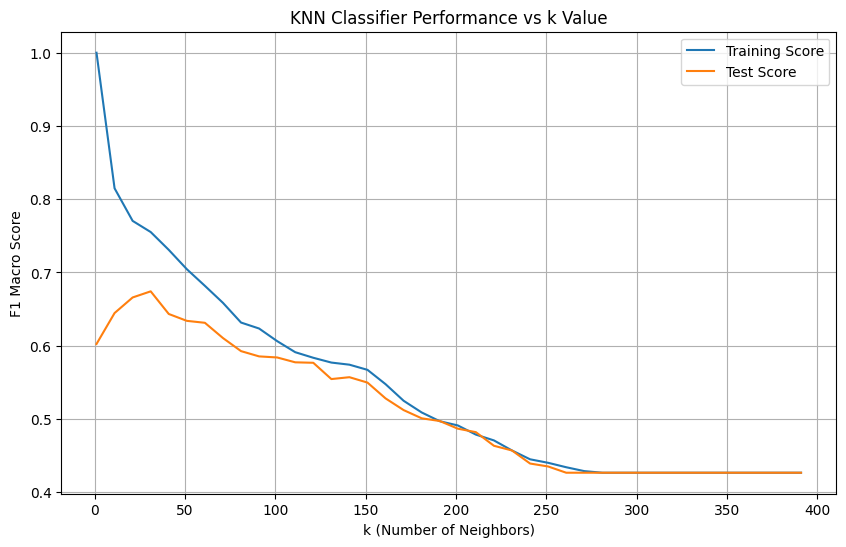


Classification Report:
              precision    recall  f1-score   support

       False       0.85      0.93      0.89       696
        True       0.72      0.53      0.61       240

    accuracy                           0.83       936
   macro avg       0.79      0.73      0.75       936
weighted avg       0.82      0.83      0.82       936

Best parameters: {'kneighborsclassifier__n_neighbors': 31}
Best F1 macro score: 0.6741562538013064


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
import pandas as pd

df = diem_and_house_and_info

X = df[["House Price", "Population Size", "Population Density", "County Name"]]
y = df["isStandard"]

num_cols = ["House Price", "Population Size", "Population Density"]
cat_cols = ["County Name"]

# Add imputation steps for both numerical and categorical columns
col_transformer = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy="median"), StandardScaler()), num_cols),
    (make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")), cat_cols),
    remainder="drop"
)

pipeline = make_pipeline(col_transformer, KNeighborsClassifier())

grid_cv = GridSearchCV(
    estimator=pipeline,
    param_grid={"kneighborsclassifier__n_neighbors": range(1, 400, 10)},
    scoring="f1_macro",
    cv=5,
    return_train_score=True
)

grid_cv.fit(X, y)

results = pd.DataFrame(grid_cv.cv_results_)

plt.figure(figsize=(10, 6))
plt.plot(results["param_kneighborsclassifier__n_neighbors"], results["mean_train_score"], label="Training Score")
plt.plot(results["param_kneighborsclassifier__n_neighbors"], results["mean_test_score"], label="Test Score")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("F1 Macro Score")
plt.title("KNN Classifier Performance vs k Value")
plt.legend()
plt.grid(True)
plt.show()

# Get the best model and refit on all data
best_model = grid_cv.best_estimator_

# Make predictions on the same data to get the classification report
y_pred = best_model.predict(X)

# Generate and print classification report
report = classification_report(y, y_pred)
print("\nClassification Report:")
print(report)
print("Best parameters:", grid_cv.best_params_)
print("Best F1 macro score:", grid_cv.best_score_)

### K Neighbors Regressor

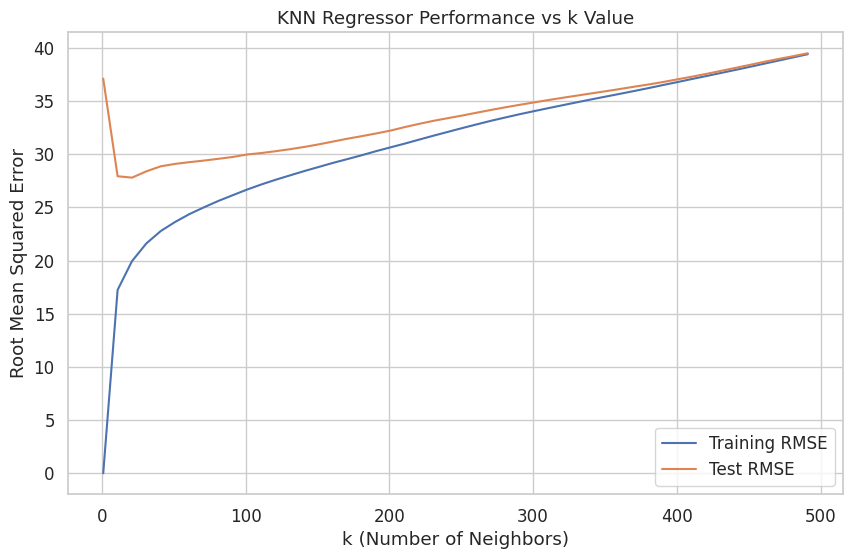


Regression Metrics:
RMSE: 19.7652
R² Score: 0.8203
Best parameters: {'kneighborsregressor__n_neighbors': 21}
Best neg RMSE score: -27.796335882362815
Best RMSE score: 27.796335882362815


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

df = diem_and_house_and_info

X = df[["House Price", "Population Size", "Population Density", "County Name", "isStandard"]]
y = df["Per Diem Daily Rate"]

num_cols = ["House Price", "Population Size", "Population Density"]
cat_cols = ["County Name", "isStandard"]

# Add imputation steps for both numerical and categorical columns
col_transformer = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy="median"), StandardScaler()), num_cols),
    (make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")), cat_cols),
    remainder="drop"
)

pipeline = make_pipeline(col_transformer, KNeighborsRegressor())

grid_cv = GridSearchCV(
    estimator=pipeline,
    param_grid={"kneighborsregressor__n_neighbors": range(1, 500, 10)},
    scoring="neg_root_mean_squared_error",
    cv=5,
    return_train_score=True
)

grid_cv.fit(X, y)

results = pd.DataFrame(grid_cv.cv_results_)

plt.figure(figsize=(10, 6))
plt.plot(results["param_kneighborsregressor__n_neighbors"], -results["mean_train_score"], label="Training RMSE")
plt.plot(results["param_kneighborsregressor__n_neighbors"], -results["mean_test_score"], label="Test RMSE")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Root Mean Squared Error")
plt.title("KNN Regressor Performance vs k Value")
plt.legend()
plt.grid(True)
plt.show()

# Get the best model and refit on all data
best_model = grid_cv.best_estimator_

# Make predictions on the same data to evaluate regression performance
y_pred = best_model.predict(X)

# Generate and print regression metrics
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print("\nRegression Metrics:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print("Best parameters:", grid_cv.best_params_)
print("Best neg RMSE score:", grid_cv.best_score_)
print("Best RMSE score:", -grid_cv.best_score_)


### Random Forest Regressor


Regression Metrics:
Training RMSE: 7.9703
Test RMSE: 10.4568
Training R² Score: 0.9782
Test R² Score: 0.9695
Best parameters: {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 'sqrt', 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 100}
CV Best RMSE score: 20.599490350298964


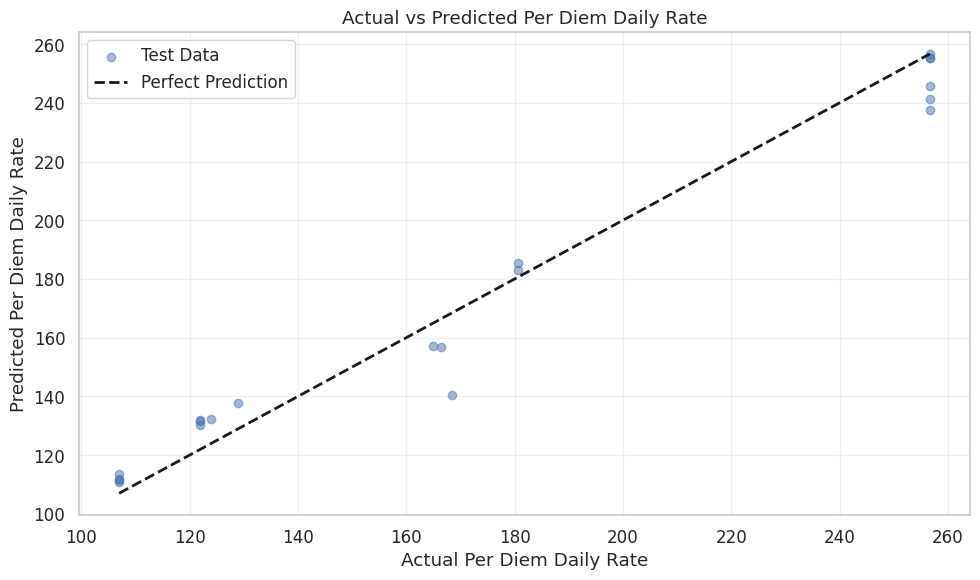

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

df = diem_and_house_and_info

X = df[["House Price", "Population Size", "Population Density", "County Name", "isStandard"]]
y = df["Per Diem Daily Rate"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_cols = ["House Price", "Population Size", "Population Density"]
cat_cols = ["County Name", "isStandard"]

# Add imputation steps for both numerical and categorical columns
col_transformer = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy="median"), StandardScaler()), num_cols),
    (make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")), cat_cols),
    remainder="drop"
)

pipeline = make_pipeline(col_transformer, RandomForestRegressor(random_state=42))

param_grid = {
    "randomforestregressor__n_estimators": [20, 100, 200],
    "randomforestregressor__max_features": ["sqrt", "log2"],
    "randomforestregressor__min_samples_split": [2, 5, 10],
    "randomforestregressor__max_depth": [None, 20, 50]
}

grid_cv = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    return_train_score=True
)

# Fit on training data only
grid_cv.fit(X_train, y_train)

# Get the best model
best_model = grid_cv.best_estimator_

# Make predictions on test data
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate metrics on both training and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nRegression Metrics:")
print(f"Training RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")
print(f"Training R² Score: {train_r2:.4f}")
print(f"Test R² Score: {test_r2:.4f}")
print("Best parameters:", grid_cv.best_params_)
print("CV Best RMSE score:", -grid_cv.best_score_)

# Create a scatterplot of actual vs predicted rates
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, label='Test Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Per Diem Daily Rate')
plt.ylabel('Predicted Per Diem Daily Rate')
plt.title('Actual vs Predicted Per Diem Daily Rate')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# Data Analysis

### Plot Experimentation

Box plot to help us visualize the spread of data: where are the standard rates concentrated? Non standard rates?

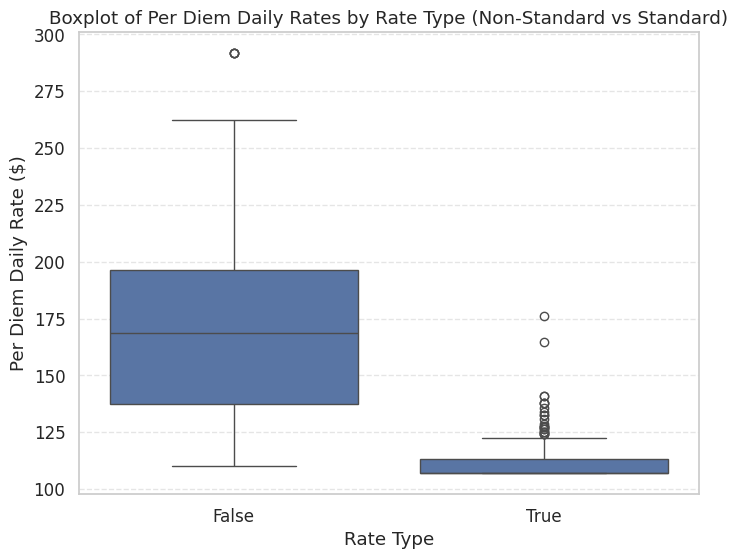

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="isStandard", y="Per Diem Daily Rate")
plt.title("Boxplot of Per Diem Daily Rates by Rate Type (Non-Standard vs Standard)")
plt.xlabel("Rate Type")
plt.ylabel("Per Diem Daily Rate ($)")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


Histogram to help us visualize the spread of per-diem rates. Where do we see standard per diem rates concentrated? What per diem rates are in the highest range?

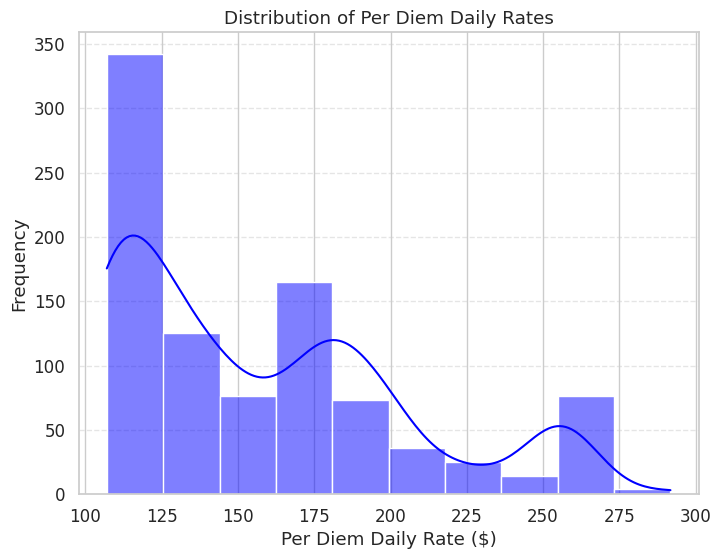

In [ ]:
# create the histrogram
plt.figure(figsize=(8, 6))
sns.histplot(df["Per Diem Daily Rate"], bins=10, kde=True, color="blue")
plt.title("Distribution of Per Diem Daily Rates")
plt.xlabel("Per Diem Daily Rate ($)")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


Check the number of standard and non-standard rates.

In [ ]:
# count the number of rows where isStandard is True and False
is_standard_counts = df["isStandard"].value_counts()
print("Standard rate:")
print(is_standard_counts)


Standard rate:
isStandard
False    696
True     240
Name: count, dtype: int64


Check summary statistics for all per diem rates.

In [ ]:
# Calculate summary statistics for Per Diem Daily Rate
per_diem_summary = df["Per Diem Daily Rate"].describe()
print("\nSummary Statistics for Per Diem Daily Rate:")
print(per_diem_summary)





Summary Statistics for Per Diem Daily Rate:
count    936.000000
mean     157.332591
std       46.645857
min      107.000000
25%      118.000000
50%      144.666667
75%      180.666667
max      291.750000
Name: Per Diem Daily Rate, dtype: float64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = diem_and_house_and_info
df = df.dropna()

plt.figure(figsize=(15, 10))

# 1. Per Diem Rate vs House Price
plt.subplot(2, 3, 1)
plt.scatter(df['Per Diem Daily Rate'], df['House Price'], alpha=0.5, c=df['isStandard'].map({True: 'green', False: 'blue'}))
plt.title('Per Diem Rate vs House Price')
plt.xlabel('Per Diem Daily Rate ($)')
plt.ylabel('House Price ($)')
plt.grid(True)

# 2. Per Diem Rate vs Population Density
plt.subplot(2, 3, 2)
plt.scatter(df['Per Diem Daily Rate'], df['Population Density'], alpha=0.5, c=df['isStandard'].map({True: 'green', False: 'blue'}))
plt.title('Per Diem Rate vs Population Density')
plt.xlabel('Per Diem Daily Rate ($)')
plt.ylabel('Population Density')
plt.grid(True)

# 3. House Price vs Population Size
plt.subplot(2, 3, 3)
plt.scatter(df['House Price'], df['Population Size'], alpha=0.5, c=df['isStandard'].map({True: 'green', False: 'blue'}))
plt.title('House Price vs Population Size')
plt.xlabel('House Price ($)')
plt.ylabel('Population Size')
plt.grid(True)

# 4. Log-transformed House Price vs Log-transformed Population Density
plt.subplot(2, 3, 4)
plt.scatter(np.log1p(df['House Price']), np.log1p(df['Population Density']), alpha=0.5, c=df['isStandard'].map({True: 'green', False: 'blue'}))
plt.title('Log House Price vs Log Population Density')
plt.xlabel('Log House Price')
plt.ylabel('Log Population Density')
plt.grid(True)

# 5. Population Size vs Population Density
plt.subplot(2, 3, 5)
plt.scatter(df['Population Size'], df['Population Density'], alpha=0.5, c=df['isStandard'].map({True: 'green', False: 'blue'}))
plt.title('Population Size vs Population Density')
plt.xlabel('Population Size')
plt.ylabel('Population Density')
plt.grid(True)

# 6. House Price to Per Diem Ratio vs Population Density
df['Price_to_Diem_Ratio'] = df['House Price'] / df['Per Diem Daily Rate']
plt.subplot(2, 3, 6)
plt.scatter(df['Price_to_Diem_Ratio'], df['Population Density'], alpha=0.5, c=df['isStandard'].map({True: 'green', False: 'blue'}))
plt.title('Price-to-Diem Ratio vs Population Density')
plt.xlabel('House Price / Per Diem Rate')
plt.ylabel('Population Density')
plt.grid(True)

plt.tight_layout()
plt.savefig('scatterplots_set1.png')
plt.close()

# Create a second set of plots
plt.figure(figsize=(15, 10))

# 7. Per Diem Rate vs Population Size
plt.subplot(2, 3, 1)
plt.scatter(df['Per Diem Daily Rate'], df['Population Size'], alpha=0.5, c=df['isStandard'].map({True: 'green', False: 'blue'}))
plt.title('Per Diem Rate vs Population Size')
plt.xlabel('Per Diem Daily Rate ($)')
plt.ylabel('Population Size')
plt.grid(True)

# 8. Create Urban Index (Pop Density * Pop Size / 10000)
df['Urban_Index'] = df['Population Density'] * df['Population Size'] / 10000
plt.subplot(2, 3, 2)
plt.scatter(df['Urban_Index'], df['Per Diem Daily Rate'], alpha=0.5, c=df['isStandard'].map({True: 'green', False: 'blue'}))
plt.title('Urban Index vs Per Diem Rate')
plt.xlabel('Urban Index')
plt.ylabel('Per Diem Daily Rate ($)')
plt.grid(True)

# 9. House Price vs Per Diem Rate by State
plt.subplot(2, 3, 3)
for state in df['State'].unique()[:5]:  # Limit to 5 states for clarity
    state_data = df[df['State'] == state]
    plt.scatter(state_data['Per Diem Daily Rate'], state_data['House Price'], alpha=0.7, label=state)
plt.title('House Price vs Per Diem Rate by State')
plt.xlabel('Per Diem Daily Rate ($)')
plt.ylabel('House Price ($)')
plt.legend()
plt.grid(True)

# 10. Standardized House Price vs Standardized Per Diem Rate
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[['House Price', 'Per Diem Daily Rate']]),
                         columns=['Standardized House Price', 'Standardized Per Diem Daily Rate'])
df_scaled['isStandard'] = df['isStandard'].values

plt.subplot(2, 3, 4)
plt.scatter(df_scaled['Standardized Per Diem Daily Rate'], df_scaled['Standardized House Price'],
            alpha=0.5, c=df_scaled['isStandard'].map({True: 'green', False: 'blue'}))
plt.title('Standardized House Price vs Standardized Per Diem Rate')
plt.xlabel('Standardized Per Diem Daily Rate')
plt.ylabel('Standardized House Price')
plt.grid(True)

# 11. House Price vs Population Density by Standard Rate
plt.subplot(2, 3, 5)
standard_rate = df[df['isStandard'] == True]
non_standard_rate = df[df['isStandard'] == False]
plt.scatter(standard_rate['Population Density'], standard_rate['House Price'], alpha=0.5, label='Standard Rate', color='green')
plt.scatter(non_standard_rate['Population Density'], non_standard_rate['House Price'], alpha=0.5, label='Non-Standard Rate', color='blue')
plt.title('House Price vs Population Density by Rate Type')
plt.xlabel('Population Density')
plt.ylabel('House Price ($)')
plt.legend()
plt.grid(True)

# 12. Per Diem Rate vs State (boxplot)
plt.subplot(2, 3, 6)
top_states = df.groupby('State').size().nlargest(10).index
state_data = df[df['State'].isin(top_states)]
sns.boxplot(x='State', y='Per Diem Daily Rate', data=state_data)
plt.title('Per Diem Rate Distribution by State')
plt.xlabel('State')
plt.ylabel('Per Diem Daily Rate ($)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('scatterplots_set2.png')
plt.close()

# Create a third set of plots
plt.figure(figsize=(15, 10))

# 13. Per Diem Rate vs isStandard (boxplot)
plt.subplot(2, 2, 1)
sns.boxplot(x='isStandard', y='Per Diem Daily Rate', data=df)
plt.title('Per Diem Rate by Standard Status')
plt.xlabel('Is Standard Rate')
plt.ylabel('Per Diem Daily Rate ($)')
plt.grid(True)

# 14. House Price vs County FIPS (for top counties)
top_counties = df.groupby('County Name').size().nlargest(10).index
county_data = df[df['County Name'].isin(top_counties)]
plt.subplot(2, 2, 2)
for county in top_counties:
    county_subset = county_data[county_data['County Name'] == county]
    plt.scatter(county_subset['Per Diem Daily Rate'], county_subset['House Price'], alpha=0.7, label=county)
plt.title('House Price vs Per Diem Rate by County')
plt.xlabel('Per Diem Daily Rate ($)')
plt.ylabel('House Price ($)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# 15. Create Cost of Living Index (House Price / National Median)
national_median = df['House Price'].median()
df['Cost_of_Living_Index'] = df['House Price'] / national_median
plt.subplot(2, 2, 3)
plt.scatter(df['Cost_of_Living_Index'], df['Per Diem Daily Rate'], alpha=0.5, c=df['isStandard'].map({True: 'green', False: 'blue'}))
plt.title('Cost of Living Index vs Per Diem Rate')
plt.xlabel('Cost of Living Index')
plt.ylabel('Per Diem Daily Rate ($)')
plt.grid(True)

# 16. Per Diem Rate vs House Price with Population Size as marker size
plt.subplot(2, 2, 4)
plt.scatter(df['Per Diem Daily Rate'], df['House Price'],
            alpha=0.5, c=df['isStandard'].map({True: 'green', False: 'blue'}),
            s=df['Population Size']/1000)  # Scale down for visibility
plt.title('Per Diem Rate vs House Price (Size = Population)')
plt.xlabel('Per Diem Daily Rate ($)')

plt.ylabel('House Price ($)')
plt.grid(True)

plt.tight_layout()
plt.savefig('scatterplots_set3.png')
plt.close()

<ipython-input-141-9ee18c86c6a1>:52: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-141-9ee18c86c6a1>:76: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-141-9ee18c86c6a1>:161: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Plot Experimentation #2

<ipython-input-142-ac1e7d67b317>:53: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-142-ac1e7d67b317>:138: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




ValueError: autodetected range of [nan, nan] is not finite

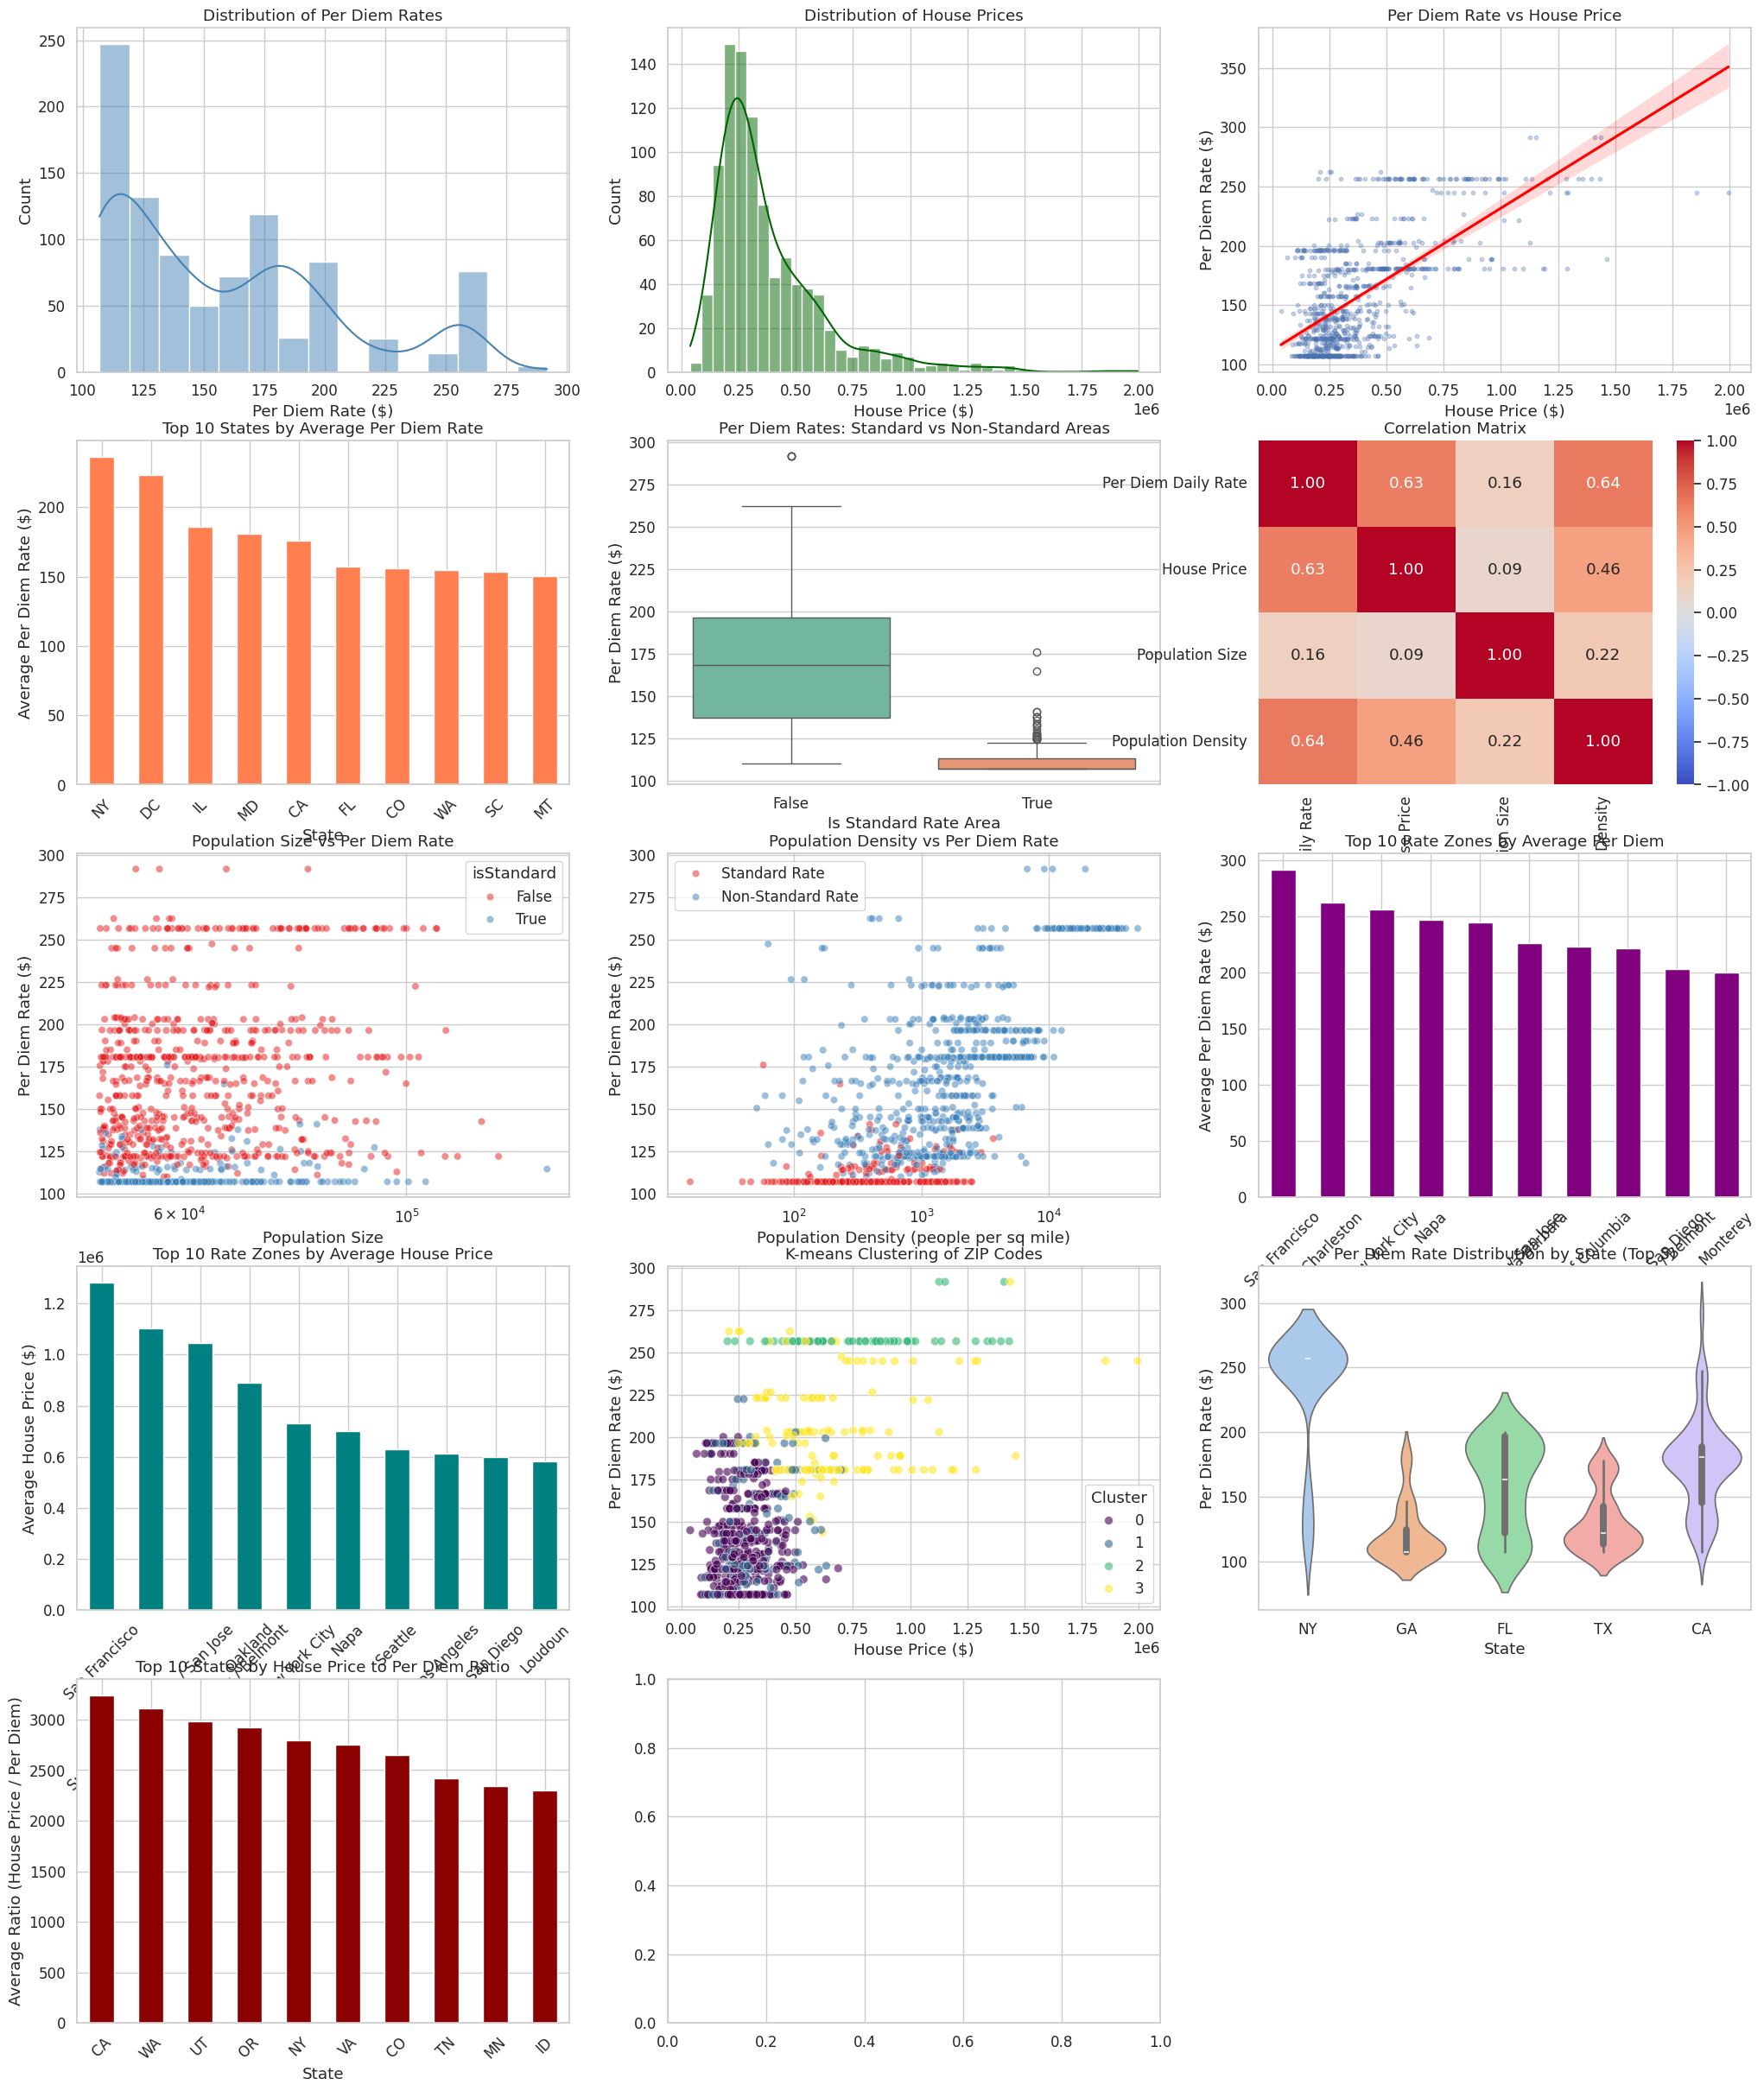

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap

df = diem_and_house_and_info

plt.style.use('ggplot')
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

fig = plt.figure(figsize=(25, 30))

# 1. Per Diem Rate Distribution
ax1 = fig.add_subplot(5, 3, 1)
sns.histplot(df['Per Diem Daily Rate'], kde=True, ax=ax1, color='steelblue')
ax1.set_title('Distribution of Per Diem Rates')
ax1.set_xlabel('Per Diem Rate ($)')
ax1.set_ylabel('Count')

# 2. House Price Distribution
ax2 = fig.add_subplot(5, 3, 2)
sns.histplot(df['House Price'], kde=True, ax=ax2, color='darkgreen')
ax2.set_title('Distribution of House Prices')
ax2.set_xlabel('House Price ($)')
ax2.set_ylabel('Count')

# 3. Scatter plot: Per Diem vs House Price
ax3 = fig.add_subplot(5, 3, 3)
sns.regplot(x='House Price', y='Per Diem Daily Rate', data=df, scatter_kws={'alpha':0.3, 's':10},
            line_kws={'color':'red'}, ax=ax3)
ax3.set_title('Per Diem Rate vs House Price')
ax3.set_xlabel('House Price ($)')
ax3.set_ylabel('Per Diem Rate ($)')

# 4. Top 10 states by average Per Diem Rate
ax4 = fig.add_subplot(5, 3, 4)
state_avg = df.groupby('State')['Per Diem Daily Rate'].mean().sort_values(ascending=False).head(10)
state_avg.plot(kind='bar', ax=ax4, color='coral')
ax4.set_title('Top 10 States by Average Per Diem Rate')
ax4.set_xlabel('State')
ax4.set_ylabel('Average Per Diem Rate ($)')
plt.setp(ax4.xaxis.get_majorticklabels(), rotation=45)

# 5. Box plot: Per Diem by Standard vs Non-Standard
ax5 = fig.add_subplot(5, 3, 5)
sns.boxplot(x='isStandard', y='Per Diem Daily Rate', data=df, ax=ax5, palette='Set2')
ax5.set_title('Per Diem Rates: Standard vs Non-Standard Areas')
ax5.set_xlabel('Is Standard Rate Area')
ax5.set_ylabel('Per Diem Rate ($)')

# 6. Correlation Heatmap
ax6 = fig.add_subplot(5, 3, 6)
numeric_cols = ['Per Diem Daily Rate', 'House Price', 'Population Size', 'Population Density']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax6, fmt='.2f')
ax6.set_title('Correlation Matrix')

# 7. Population Size vs Per Diem Rate
ax7 = fig.add_subplot(5, 3, 7)
sns.scatterplot(x='Population Size', y='Per Diem Daily Rate', data=df, alpha=0.5, ax=ax7, hue='isStandard', palette='Set1')
ax7.set_title('Population Size vs Per Diem Rate')
ax7.set_xlabel('Population Size')
ax7.set_ylabel('Per Diem Rate ($)')
ax7.set_xscale('log')  # Log scale for better visualization

# 8. Population Density vs Per Diem Rate
ax8 = fig.add_subplot(5, 3, 8)
scatter = sns.scatterplot(
    x='Population Density',
    y='Per Diem Daily Rate',
    data=df,
    alpha=0.5,
    ax=ax8,
    hue='isStandard',
    palette='Set1',
    hue_order=[True, False]  # Adjust based on your actual values
)
ax8.set_title('Population Density vs Per Diem Rate')
ax8.set_xlabel('Population Density (people per sq mile)')
ax8.set_ylabel('Per Diem Rate ($)')
ax8.set_xscale('log')  # Log scale for better visualization

# Create custom legend with explicit mapping
custom_labels = {"True": "Standard Rate", "False": "Non-Standard Rate"}  # Adjust based on your values
handles, labels = ax8.get_legend_handles_labels()
ax8.legend(handles, [custom_labels[label] for label in labels])

# 9. Per Diem Rate by Rate Zone (Top 10)
ax9 = fig.add_subplot(5, 3, 9)
zone_avg = df.groupby('Rate Zone')['Per Diem Daily Rate'].mean().sort_values(ascending=False).head(10)
zone_avg.plot(kind='bar', ax=ax9, color='purple')
ax9.set_title('Top 10 Rate Zones by Average Per Diem')
ax9.set_xlabel('Rate Zone')
ax9.set_ylabel('Average Per Diem Rate ($)')
plt.setp(ax9.xaxis.get_majorticklabels(), rotation=45)

# 10. House Price by Rate Zone (Top 10)
ax10 = fig.add_subplot(5, 3, 10)
zone_house = df.groupby('Rate Zone')['House Price'].mean().sort_values(ascending=False).head(10)
zone_house.plot(kind='bar', ax=ax10, color='teal')
ax10.set_title('Top 10 Rate Zones by Average House Price')
ax10.set_xlabel('Rate Zone')
ax10.set_ylabel('Average House Price ($)')
plt.setp(ax10.xaxis.get_majorticklabels(), rotation=45)

# 11. K-means clustering
ax11 = fig.add_subplot(5, 3, 11)
# Select features for clustering
features = ['Per Diem Daily Rate', 'House Price', 'Population Size', 'Population Density']
X = df[features].copy()
# Handle missing values
X = X.fillna(X.mean())
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)
# Visualize clusters
sns.scatterplot(x='House Price', y='Per Diem Daily Rate', hue='Cluster', data=df, palette='viridis',
                alpha=0.6, s=50, ax=ax11)
ax11.set_title('K-means Clustering of ZIP Codes')
ax11.set_xlabel('House Price ($)')
ax11.set_ylabel('Per Diem Rate ($)')

# 12. Per Diem Rate Distribution by State (Violin Plot)
ax12 = fig.add_subplot(5, 3, 12)
# Select top 5 states by count
top_states = df['State'].value_counts().head(5).index.tolist()
state_subset = df[df['State'].isin(top_states)]
sns.violinplot(x='State', y='Per Diem Daily Rate', data=state_subset, ax=ax12, palette='pastel')
ax12.set_title('Per Diem Rate Distribution by State (Top 5)')
ax12.set_xlabel('State')
ax12.set_ylabel('Per Diem Rate ($)')

# 13. House Price to Per Diem Ratio by State
ax13 = fig.add_subplot(5, 3, 13)
# Calculate ratio
df['Price_to_PerDiem_Ratio'] = df['House Price'] / df['Per Diem Daily Rate']
ratio_by_state = df.groupby('State')['Price_to_PerDiem_Ratio'].mean().sort_values(ascending=False).head(10)
ratio_by_state.plot(kind='bar', ax=ax13, color='darkred')
ax13.set_title('Top 10 States by House Price to Per Diem Ratio')
ax13.set_xlabel('State')
ax13.set_ylabel('Average Ratio (House Price / Per Diem)')
plt.setp(ax13.xaxis.get_majorticklabels(), rotation=45)

# 14. Joint Distribution Plot
ax14 = fig.add_subplot(5, 3, 14)
# Create a custom colormap
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#f7fbff', '#08306b'])
# Create a 2D histogram
h = ax14.hist2d(df['House Price'], df['Per Diem Daily Rate'], bins=50, cmap=cmap)
fig.colorbar(h[3], ax=ax14, label='Count')
ax14.set_title('Joint Distribution of House Prices and Per Diem Rates')
ax14.set_xlabel('House Price ($)')
ax14.set_ylabel('Per Diem Rate ($)')

# 15. Per Diem Rate by Population Size Categories
ax15 = fig.add_subplot(5, 3, 15)
# Create population size categories
df['Population_Category'] = pd.cut(df['Population Size'],
                                  bins=[0, 1000, 5000, 10000, 50000, 100000],
                                  labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large'])
sns.boxplot(x='Population_Category', y='Per Diem Daily Rate', data=df, ax=ax15, palette='Blues')
ax15.set_title('Per Diem Rates by Population Size Category')
ax15.set_xlabel('Population Size Category')
ax15.set_ylabel('Per Diem Rate ($)')

# Adjust layout
plt.tight_layout(pad=3.0)
plt.savefig('per_diem_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Additional interactive visualizations with Plotly
# Create a choropleth map of average per diem rates by state
state_data = df.groupby('State').agg({
    'Per Diem Daily Rate': 'mean',
    'House Price': 'mean',
    'Population Size': 'sum'
}).reset_index()

fig_map = px.choropleth(state_data,
                      locations='State',
                      locationmode='USA-states',
                      color='Per Diem Daily Rate',
                      scope='usa',
                      color_continuous_scale='Viridis',
                      title='Average Per Diem Rate by State')
fig_map.show()

# Create a bubble chart of per diem rates, house prices, and population
fig_bubble = px.scatter(state_data,
                       x='House Price',
                       y='Per Diem Daily Rate',
                       size='Population Size',
                       color='State',
                       hover_name='State',
                       size_max=60,
                       title='Per Diem Rate vs House Price by State (Bubble Size = Population)')
fig_bubble.show()

# Create a sunburst chart of per diem rates by state and rate zone
sunburst_data = df.groupby(['State', 'Rate Zone']).agg({
    'Per Diem Daily Rate': 'mean',
    'Zip Code': 'count'
}).reset_index()
sunburst_data = sunburst_data.rename(columns={'Zip Code': 'Count'})

fig_sunburst = px.sunburst(sunburst_data,
                          path=['State', 'Rate Zone'],
                          values='Count',
                          color='Per Diem Daily Rate',
                          color_continuous_scale='RdBu',
                          title='Per Diem Rates by State and Rate Zone')
fig_sunburst.show()

### Plot Experimentation #3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
import traceback

df = diem_and_house_and_info

# Set up the visualization environment
plt.style.use('ggplot')
sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.dpi'] = 100

# Function to save plot
def create_and_save_plot(plot_num, plot_function):
    try:
        plt.figure(figsize=(12, 8))
        plot_function()
        plt.tight_layout()
        plt.savefig(f'plot_{plot_num}.png', dpi=300, bbox_inches='tight')
        plt.close()
        print(f"Successfully created plot_{plot_num}.png")
    except Exception as e:
        print(f"Error creating plot_{plot_num}: {str(e)}")
        traceback.print_exc()
        plt.close()  # Close the figure even if there was an error

# 8. Population Density vs Per Diem Rate
create_and_save_plot(8, lambda: sns.scatterplot(x='Population Density', y='Per Diem Daily Rate',
                                              data=df, alpha=0.5, hue='isStandard', palette='Set1')
                    and plt.title('Population Density vs Per Diem Rate')
                    and plt.xlabel('Population Density (people per sq mile)')
                    and plt.ylabel('Per Diem Rate ($)')
                    and plt.xscale('log'))


Successfully created plot_8.png


### Plot Experimentation #4

<ipython-input-144-a9711a30a838>:58: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-144-a9711a30a838>:75: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-144-a9711a30a838>:156: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



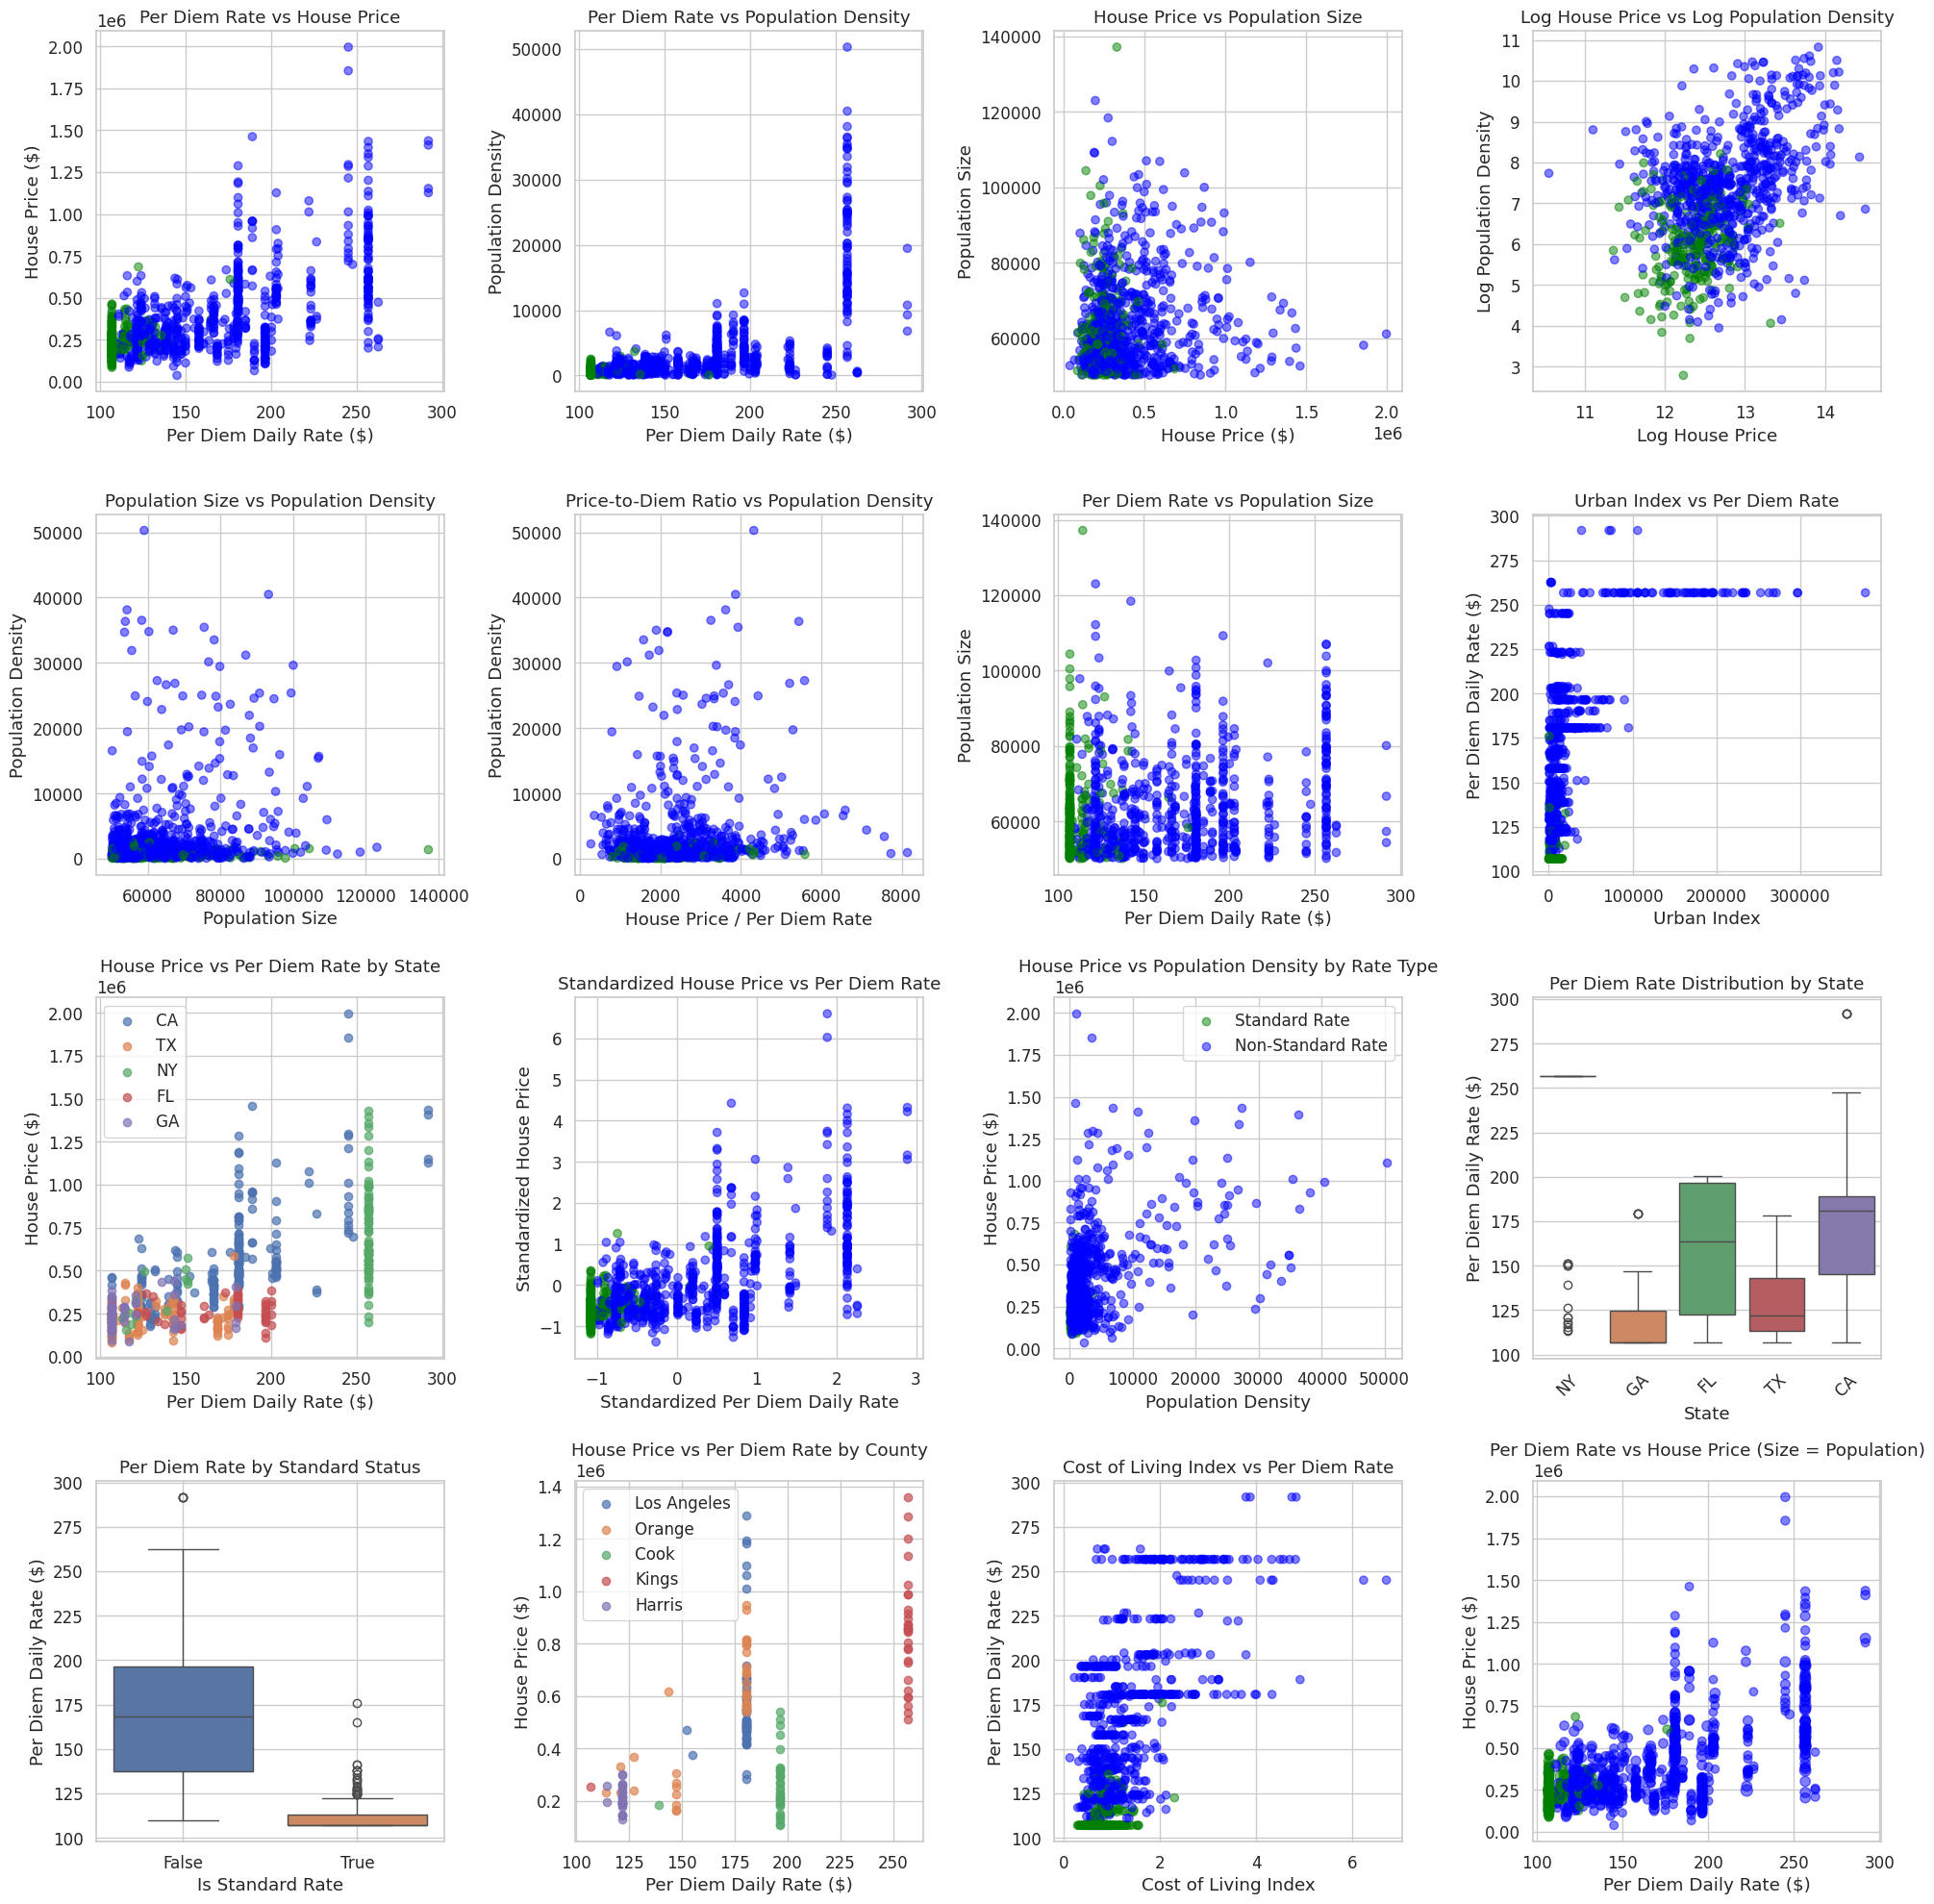

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import LinearSegmentedColormap

df = diem_and_house_and_info

df = df.dropna(subset=['House Price', 'Per Diem Daily Rate', 'Population Size', 'Population Density'])

# Create a figure with multiple subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# 1. Per Diem Rate vs House Price
axes[0].scatter(df['Per Diem Daily Rate'], df['House Price'], alpha=0.5,
               c=df['isStandard'].map({True: 'green', False: 'blue'}))
axes[0].set_title('Per Diem Rate vs House Price')
axes[0].set_xlabel('Per Diem Daily Rate ($)')
axes[0].set_ylabel('House Price ($)')
axes[0].grid(True)

# 2. Per Diem Rate vs Population Density
axes[1].scatter(df['Per Diem Daily Rate'], df['Population Density'], alpha=0.5,
               c=df['isStandard'].map({True: 'green', False: 'blue'}))
axes[1].set_title('Per Diem Rate vs Population Density')
axes[1].set_xlabel('Per Diem Daily Rate ($)')
axes[1].set_ylabel('Population Density')
axes[1].grid(True)

# 3. House Price vs Population Size
axes[2].scatter(df['House Price'], df['Population Size'], alpha=0.5,
               c=df['isStandard'].map({True: 'green', False: 'blue'}))
axes[2].set_title('House Price vs Population Size')
axes[2].set_xlabel('House Price ($)')
axes[2].set_ylabel('Population Size')
axes[2].grid(True)

# 4. Log-transformed House Price vs Log-transformed Population Density
# Add small value to avoid log(0)
axes[3].scatter(np.log1p(df['House Price']), np.log1p(df['Population Density']), alpha=0.5,
               c=df['isStandard'].map({True: 'green', False: 'blue'}))
axes[3].set_title('Log House Price vs Log Population Density')
axes[3].set_xlabel('Log House Price')
axes[3].set_ylabel('Log Population Density')
axes[3].grid(True)

# 5. Population Size vs Population Density
axes[4].scatter(df['Population Size'], df['Population Density'], alpha=0.5,
               c=df['isStandard'].map({True: 'green', False: 'blue'}))
axes[4].set_title('Population Size vs Population Density')
axes[4].set_xlabel('Population Size')
axes[4].set_ylabel('Population Density')
axes[4].grid(True)

# 6. House Price to Per Diem Ratio vs Population Density
df['Price_to_Diem_Ratio'] = df['House Price'] / df['Per Diem Daily Rate']
axes[5].scatter(df['Price_to_Diem_Ratio'], df['Population Density'], alpha=0.5,
               c=df['isStandard'].map({True: 'green', False: 'blue'}))
axes[5].set_title('Price-to-Diem Ratio vs Population Density')
axes[5].set_xlabel('House Price / Per Diem Rate')
axes[5].set_ylabel('Population Density')
axes[5].grid(True)

# 7. Per Diem Rate vs Population Size
axes[6].scatter(df['Per Diem Daily Rate'], df['Population Size'], alpha=0.5,
               c=df['isStandard'].map({True: 'green', False: 'blue'}))
axes[6].set_title('Per Diem Rate vs Population Size')
axes[6].set_xlabel('Per Diem Daily Rate ($)')
axes[6].set_ylabel('Population Size')
axes[6].grid(True)

# 8. Create Urban Index (Pop Density * Pop Size / 10000)
df['Urban_Index'] = df['Population Density'] * df['Population Size'] / 10000
axes[7].scatter(df['Urban_Index'], df['Per Diem Daily Rate'], alpha=0.5,
               c=df['isStandard'].map({True: 'green', False: 'blue'}))
axes[7].set_title('Urban Index vs Per Diem Rate')
axes[7].set_xlabel('Urban Index')
axes[7].set_ylabel('Per Diem Daily Rate ($)')
axes[7].grid(True)

# 9. House Price vs Per Diem Rate by State (top 5 states)
top_states = df['State'].value_counts().nlargest(5).index
for state in top_states:
    state_data = df[df['State'] == state]
    axes[8].scatter(state_data['Per Diem Daily Rate'], state_data['House Price'], alpha=0.7, label=state)
axes[8].set_title('House Price vs Per Diem Rate by State')
axes[8].set_xlabel('Per Diem Daily Rate ($)')
axes[8].set_ylabel('House Price ($)')
axes[8].legend()
axes[8].grid(True)

# 10. Standardized House Price vs Standardized Per Diem Rate
scaler = StandardScaler()
numeric_cols = ['House Price', 'Per Diem Daily Rate']
df_scaled = pd.DataFrame(
    scaler.fit_transform(df[numeric_cols]),
    columns=['Standardized House Price', 'Standardized Per Diem Daily Rate']
)
df_scaled['isStandard'] = df['isStandard'].values

axes[9].scatter(df_scaled['Standardized Per Diem Daily Rate'],
                df_scaled['Standardized House Price'],
                alpha=0.5,
                c=df_scaled['isStandard'].map({True: 'green', False: 'blue'}))
axes[9].set_title('Standardized House Price vs Per Diem Rate')
axes[9].set_xlabel('Standardized Per Diem Daily Rate')
axes[9].set_ylabel('Standardized House Price')
axes[9].grid(True)

# 11. House Price vs Population Density by Standard Rate
standard_rate = df[df['isStandard'] == True]
non_standard_rate = df[df['isStandard'] == False]
axes[10].scatter(standard_rate['Population Density'], standard_rate['House Price'],
                alpha=0.5, label='Standard Rate', color='green')
axes[10].scatter(non_standard_rate['Population Density'], non_standard_rate['House Price'],
                alpha=0.5, label='Non-Standard Rate', color='blue')
axes[10].set_title('House Price vs Population Density by Rate Type')
axes[10].set_xlabel('Population Density')
axes[10].set_ylabel('House Price ($)')
axes[10].legend()
axes[10].grid(True)

# 12. Per Diem Rate vs State (boxplot)
top_states = df['State'].value_counts().nlargest(5).index
state_data = df[df['State'].isin(top_states)]
sns.boxplot(x='State', y='Per Diem Daily Rate', data=state_data, ax=axes[11], hue='State', legend=False)
axes[11].set_title('Per Diem Rate Distribution by State')
axes[11].set_xlabel('State')
axes[11].set_ylabel('Per Diem Daily Rate ($)')
axes[11].tick_params(axis='x', rotation=45)

# 13. Per Diem Rate vs isStandard (boxplot)
sns.boxplot(x='isStandard', y='Per Diem Daily Rate', data=df, ax=axes[12], hue='isStandard', legend=False)
axes[12].set_title('Per Diem Rate by Standard Status')
axes[12].set_xlabel('Is Standard Rate')
axes[12].set_ylabel('Per Diem Daily Rate ($)')
axes[12].grid(True)

# 14. House Price vs County Name (for top counties)
top_counties = df['County Name'].value_counts().nlargest(5).index
county_data = df[df['County Name'].isin(top_counties)]
for county in top_counties:
    county_subset = county_data[county_data['County Name'] == county]
    axes[13].scatter(county_subset['Per Diem Daily Rate'], county_subset['House Price'],
                    alpha=0.7, label=county)
axes[13].set_title('House Price vs Per Diem Rate by County')
axes[13].set_xlabel('Per Diem Daily Rate ($)')
axes[13].set_ylabel('House Price ($)')
axes[13].legend()
axes[13].grid(True)

# 15. Create Cost of Living Index (House Price / National Median)
national_median = df['House Price'].median()
df['Cost_of_Living_Index'] = df['House Price'] / national_median
axes[14].scatter(df['Cost_of_Living_Index'], df['Per Diem Daily Rate'], alpha=0.5,
                c=df['isStandard'].map({True: 'green', False: 'blue'}))
axes[14].set_title('Cost of Living Index vs Per Diem Rate')
axes[14].set_xlabel('Cost of Living Index')
axes[14].set_ylabel('Per Diem Daily Rate ($)')
axes[14].grid(True)

# 16. Per Diem Rate vs House Price with Population Size as marker size
# Normalize population size for better visualization
pop_size_normalized = df['Population Size'] / df['Population Size'].max() * 100
axes[15].scatter(df['Per Diem Daily Rate'], df['House Price'],
                alpha=0.5,
                c=df['isStandard'].map({True: 'green', False: 'blue'}),
                s=pop_size_normalized)
axes[15].set_title('Per Diem Rate vs House Price (Size = Population)')
axes[15].set_xlabel('Per Diem Daily Rate ($)')
axes[15].set_ylabel('House Price ($)')
axes[15].grid(True)

plt.tight_layout()
plt.savefig('scatterplots_all.png', dpi=300)
plt.show()


### Correlation Analysis Between 2024 Per Diem Rates and House Prices by House Price Month

In [ ]:
correlations = []

# Loop over every column in df_house_prices
for col in df_house_prices.columns:
    # Skip 'Zip Code' as it's used for merging and not a numerical value for correlation
    if col in "Zip Code RegionID	SizeRank	RegionName	RegionType	StateName	State	City	Metro	CountyName":
        continue

    # Merge per_diem with df_house_prices on the current column
    merged_df = per_diem.merge(right=df_house_prices[["Zip Code", col]], left_on="Zip Code", right_on="Zip Code")

    # Rename columns for clarity
    merged_df.columns = ["Zip Code", "Per Diem Daily Rate", "isStandrd", col]

    # Calculate correlation
    corr = merged_df[col].corr(merged_df["Per Diem Daily Rate"])

    # Store the correlation in the list
    correlations.append({"Column": col, "Correlation": corr})

# Create a DataFrame from the correlations list
correlation_df = pd.DataFrame(correlations)

# Sort the DataFrame by correlation in descending order
sorted_correlation_df = correlation_df.sort_values(by="Correlation", ascending=False)

# Display the sorted correlations
print(sorted_correlation_df)

         Column  Correlation
235  2019-08-31     0.632826
234  2019-07-31     0.632341
240  2020-01-31     0.632232
236  2019-09-30     0.632091
241  2020-02-29     0.631926
..          ...          ...
4    2000-05-31     0.417268
3    2000-04-30     0.415117
2    2000-03-31     0.411077
1    2000-02-29     0.409129
0    2000-01-31     0.407818

[301 rows x 2 columns]


### Correlation Between 2024 Per Diem Rates and House Prices by House Price Month

In [ ]:
sorted_correlation_df.sort_values(by="Column", ascending=True)
sorted_correlation_df = sorted_correlation_df.sort_values(by="Column", ascending=True)

px.bar(data_frame=sorted_correlation_df, x="Column", y="Correlation")

### Relationship Between House Prices and Per Diem Rates by Zip Code

In [ ]:
import plotly.express as px

px.scatter(data_frame=diem_and_house_and_info, x="House Price", y="Per Diem Daily Rate", hover_name="Zip Code", color="isStandard")

In [ ]:
correlation = diem_and_house_and_info["House Price"].corr(diem_and_house_and_info["Per Diem Daily Rate"])
correlation

np.float64(0.6311908691904375)

# Experimentation That Was Not Used in Final Analysis

### Google Hotels Web Scraping

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

def scrape_hotel_prices(zip_code):
    url = f"https://www.google.com/travel/search?q={zip_code}%20hotels&qs=CAEgACgAOA1IAA&ved=0CAAQ5JsGahgKEwjwpqmvnZWMAxUAAAAAHQAAAAAQ8wE&ts=CAESBgoCCAMQARpQCjISLjIlMHg4OGRlZWEzYTRjY2JlNDlkOjB4ZDkwNzA4YTJlZWUwZjI1ZDoFMzQ5NTMaABIaEhQKBwjpDxAFGAESBwjpDxAFGAIYATICCAEqCQoFOgNVU0QaAA&ap=MAE"

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept-Language': 'en-US,en;q=0.9',
        'Referer': 'https://www.google.com/'
    }

        # Fetch the webpage
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        print(f"Failed to fetch data for zip code {zip_code}: {response.status_code}")
        return []

    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all price spans with the specific jsaction attribute
    price_spans = soup.find_all('span', attrs={'jsaction': 'mouseenter:JttVIc;mouseleave:VqIRre;'})

    # Extract prices
    prices = []

    for span in price_spans:
        # Extract price text
        price_text = span.text.strip()

        # Extract numeric value from price text (removing currency symbol)
        price_match = re.search(r'[\$£€¥](\d+(?:\.\d+)?)', price_text)
        if price_match:
            price = float(price_match.group(1))
            prices.append(price)

    return prices

# List of top 1000 zip codes
top_1000_zips = top_1000_zips[:10] # for example purposes

# Create a list to store results
results = []

# Loop through each zip code
for zip_code in top_1000_zips:
    print(f"Scraping data for zip code: {zip_code}")

    # Get prices for the current zip code
    prices = scrape_hotel_prices(zip_code)

    # Calculate average price if prices were found
    if prices:
        avg_price = sum(prices) / len(prices)
        results.append({
            'Zip_Code': zip_code,
            'Average_Price': round(avg_price, 2),
            'Number_of_Hotels': len(prices)
        })
    else:
        results.append({
            'Zip_Code': zip_code,
            'Average_Price': None,
            'Number_of_Hotels': 0
        })

    # Add a delay to avoid being blocked
    time.sleep(0.1)

# Create a DataFrame from the results
avg_prices_df = pd.DataFrame(results)

print(avg_prices_df)


Scraping data for zip code: 77494
Scraping data for zip code: 08701
Scraping data for zip code: 77449
Scraping data for zip code: 78660
Scraping data for zip code: 77433
Scraping data for zip code: 60629
Scraping data for zip code: 77084
Scraping data for zip code: 11368
Scraping data for zip code: 11208
Scraping data for zip code: 79936
  Zip_Code  Average_Price  Number_of_Hotels
0    77494         104.90                40
1    08701         109.90                40
2    77449         105.05                40
3    78660         109.90                40
4    77433         103.00                40
5    60629         107.70                40
6    77084         100.50                40
7    11368         107.85                40
8    11208         110.65                40
9    79936         105.05                40


### Google Hotels Average Hotel Price by Zip Code

In [ ]:
avg_prices_df

,Zip_Code,Average_Price,Number_of_Hotels
0,77494,104.90,40
1,08701,109.90,40
2,77449,105.05,40
3,78660,109.90,40
4,77433,103.00,40
5,60629,107.70,40
6,77084,100.50,40
7,11368,107.85,40
8,11208,110.65,40
9,79936,105.05,40


### Merge Hotel Prices and Per Diem Rates on Zip Code

In [ ]:
diem_and_hotel_price = per_diem.merge(right=avg_prices_df[["Average_Price", "Zip_Code"]], left_on="Zip Code", right_on="Zip_Code")

diem_and_hotel_price.columns = ["Per Diem Daily Rate", "isStandard", "Hotel Price", "Zip Code"]

diem_and_hotel_price

,Per Diem Daily Rate,isStandard,Hotel Price,Zip Code
0,256.666667,New York City,110.65,11208
1,256.666667,New York City,107.85,11368
2,196.416667,Chicago,107.70,60629
3,122.000000,Houston,100.50,77084
4,122.000000,Houston,103.00,77433
5,122.000000,Houston,105.05,77449
6,114.500000,Standard Rate,104.90,77494
7,142.583333,Austin,109.90,78660
8,107.000000,Standard Rate,105.05,79936


### Relationship Between Hotel Prices and Per Diem Rates by Zip Code

In [ ]:
import plotly.express as px

px.scatter(data_frame=diem_and_hotel_price, x="Hotel Price", y="Per Diem Daily Rate", hover_name="Zip Code")

In [ ]:
correlation = diem_and_hotel_price["Hotel Price"].corr(diem_and_hotel_price["Per Diem Daily Rate"])
correlation

np.float64(0.6813595388446283)